# COMP47700 Speech and Audio PL1: Digital signal analysis with Python
---

## Learning outcomes
This practical tutorial covers the following learning outcomes within the COMP47700 Speech and Audio module:
* Analyse speech and audio signals and features (**LO1**)
  * Setup a basic working environment for signal analysis in Python.
  * Identify core libraries used for speech and signal analysis in Python.
* Describe the signal characteristics of speech and audio signals using appropriate terminology (**LO3**)
  * Use Python to create a mathematical representation of digital signals.
* Apply signal processing algorithms to speech and audio signals (**LO5**)
  * Read, manipulate and write wav audio files in Python.
  * Create visual representations of audio files in Python.

## Module topics
This practical tutorial builds on the following core topics:
* Introduction to speech and audio processing (Unit 1)
* Basic audio processing (Unit 2)

## Why is it important?
* Working environment
  * Python is a versatile and flexible programming language that allows for easy integration with other technologies and frameworks for machine learning (e.g., TensorFlow, PyTorch) and data analysis (e.g., Pandas).
* Digital signal understanding
  * Python provides a wide selection of libraries and powerful tools for signal analysis (e.g., NumPy, Matplotlib, Librosa). These tools allow reading, manipulating, and visualising sound signals, which is crucial for understanding the characteristics of sound signals.


## Structure of this tutorial
This practical tutorial contains different sections:
* **Live coding:** Basic theory, demos and coding examples presented by the lecturer on site (unmarked)
* **Student activity:** Familiarisation and coding exercises to be completed by the students and followed by a short discussion on site (unmarked). These activities introduce key concepts and skills necessary to complete the assignments.
* **Assignment:** Three (3) take home problem/coding questions to be completed by the students and due in two (2) weeks from the day the practical tutorial is given. Assignment questions represent fifteen (15) mark points.

## Setup notes
We will be using Google Colabs for our labs but if you wish to run speech and audio projects locally (not recommended) you will need to manage your own Python environment setup with a number of important packages.

Some important libraries for signal analysis in Python are:

* [numpy](https://numpy.org) is the fundamental package for scientific computing with Python. From a signal processing perspective it allow us to represent continuous signals as discrete digitally sampled time series.
* [matplotlib](https://matplotlib.org) is a plotting and data visualisation library. Pyplot is a Matplotlib module that allows MATLAB-like interface to the matplotlib library funtions. Practically speaking, this means that you can build up a figure plot step by step, e.g. create a figure, add axes, add data to plot, customise the title and axes labels and change to look of the figure.
* [librosa](librosa.github.io) is a Python package for music and audio processing. It allows handling audio files and provides tasks for spectral analysis, feature extraction, spectrogram visualization, etc.

---
# **[Update]**
#### **We are including a Live coding code block with instructions on how to upload files manually to the Google Colab environment.**

### **Live coding:** Uploading files from local system
We will upload and extract the content from the zip file provided with the assigment (Brightspace -> Assignment Questions PL1).
1. Import the library `files` from Google Colab
2. From your local system, select the .zip file provided for PL1 (`PL1_files.zip`)
3. Using the `zipfile` library, extract the files to your Google Colab environment (`./PL1_files/`).

In [ ]:
from google.colab import files
zipname = 'PL1_files.zip'
uploaded = files.upload()

Saving PL1_files.zip to PL1_files.zip


In [ ]:
import zipfile
# Extract the zip file
with zipfile.ZipFile(zipname, 'r') as zip_ref:
  zip_ref.extractall()  # Extract all files to the current directory

### **Live coding:** Introducing libraries and plotting with matplotlib
First we will get our environment working and familiarising ourselves with matrix and array processing in Python.
1. Import the libraries (`matplotlib, numpy, librosa`) and setup the nootbook for [magic](https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/language/IPythonMagic.ipynb) plots.

2. Create and display an array `[1,0,-1]` of 32-bit floating point numbers.

In [ ]:
#Imports and Magic
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
signal_samples = [1,0,-1]
x = np.array(signal_samples, dtype = np.float32)
print(signal_samples)
print(x)

[1, 0, -1]
[ 1.  0. -1.]


### **Live coding:** Creating a digital signal
1. Create and display an array of the `sin` of those numbers (using `numpy`)

In [ ]:
y = np.sin(x)
print(y)

[ 0.841471  0.       -0.841471]


### **Live coding:** Introducing numpy arrays and floating point representations
1. Create and display a matrix (or 2-D array) of floating point numbers, `m1` for integers in the range 0 to 3 to -3.
2. Create a new numpy array, `array2` of 32-bit floats using `m1` as the input.

What shape (i.e. matrix size) is the object `array2`?

In [ ]:
m1=[[0,1,2,3,2,1,0,-1,-2,-3],
    [0,1,2,3,2,1,0,-1,-2,-3]
    ]

In [ ]:
array2 = np.array(m1,dtype=np.float32)
print(array2.shape)
print(array2)

(2, 10)
[[ 0.  1.  2.  3.  2.  1.  0. -1. -2. -3.]
 [ 0.  1.  2.  3.  2.  1.  0. -1. -2. -3.]]


### **Live coding:** Ploting and manipulating numpy arrays
1. Create and display a matrix (or 2-D array) of floating point numbers.
2. Plot them using `matplotlib`.
3. Find the `max_y` value and its index in the array (using `argmax`).
4. Set it to zero and replot.

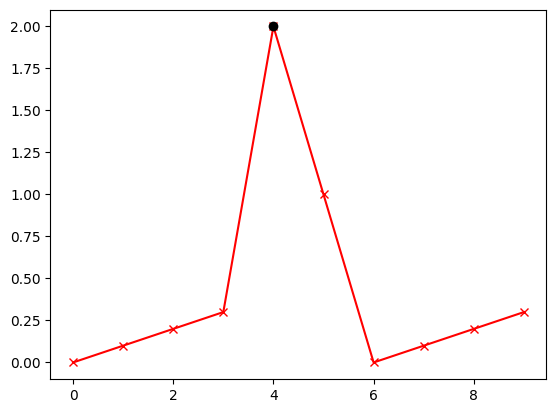

In [ ]:
m1=[[0,1,2,3,4,5,6,7,8,9],
    [0,.1,.2,.3,2,1,0,.1,.2,.3]
    ]
a1=np.array(m1,dtype=np.float32)
plt.plot(a1[0,:],a1[1,:],'r-x')

max_idx=a1.argmax(1)[1] #get the index of the max value for the y values
max_y=a1[1,max_idx]

fig1=plt.Figure()
plt.plot(max_idx,max_y,'ko')

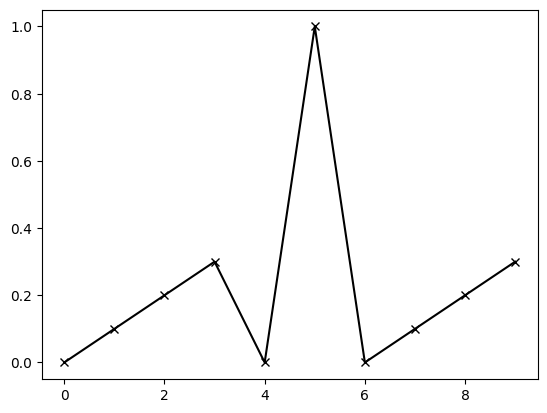

In [ ]:
a1[1,max_idx]=0
plt.clf()
plt.plot(a1[0,:],a1[1,:],'x-k')
plt.savefig('lab1fig4-1.pdf')

### **Live coding:** Representing a signal digitally
1. Create a sin wave with a period of 0.5 seconds (i.e. frequency = 2 Hz by the relationship $f=\frac{1}{t}$)
2. Sample the sin wave at 100 samples per second so the sampling frequency $f_s= 100$ Hz.
3. Create an array of 201 sinusoidal signal wave samples
4. Set up an array of time samples using `arange`.
5. Compute the amplitude value $x$ of our wave at each time point $x=sin(2\pi f t)$
6. Plot the wave.

**Notes:** `arange` is a NumPy library method see [documentation](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) for details.

size of t: 201
t: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.9

Text(0, 0.5, 'amplitude')

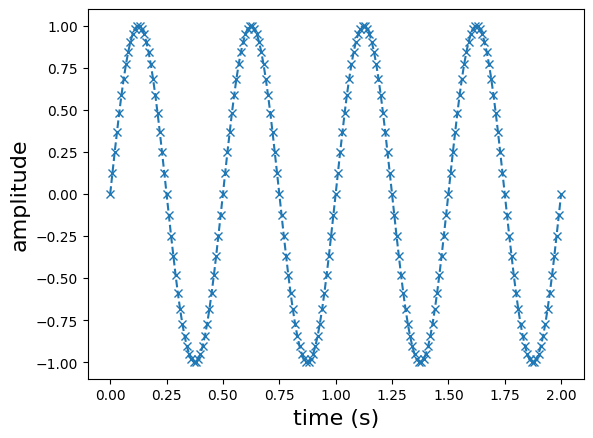

In [ ]:
f  = 2.0 # Frequency of sine wave = 2 Hz, (i.e. the singal frequency is 2 Hz so the period of 0.5 seconds)
fs = 100 # Sample the signal at 100 samples per second (i.e. the sampling rate is 100 Hz)

t = np.arange(0,2+1/fs,1/fs) # sample interval, symmetric for convenience later

print('size of t:',t.size)
print('t:',t)

fig,ax = plt.subplots()

x = np.sin(2*np.pi*f*t)
print('x=sin(t):',t)
ax.plot(t,x,'x--')
# units here are seconds on the x-axis as we are plotting the signal over time
ax.set_xlabel('time (s)',fontsize=16)
# no digigal units here -1 -> +1 scale is amplitude and we are using floating point precision
# in the analogue world this could be a voltage (Volts) or current (Amps) or a representation of pressure (Pascals)
ax.set_ylabel('amplitude',fontsize=16)

### **Student activity #1:** Signal representation
Generate and plot a sinusoidal signal using the following parameters:
* `frequency = 10` (in Hz)
* `duration = 2` (in seconds)
* `sample_rate = 1000` (samples per second)

**Note**: Syntax can sometimes be confusing: sampling frequency $f_s$ or sampling rate, sr, are different syntax for the same thing.

Text(0, 0.5, 'amplitude')

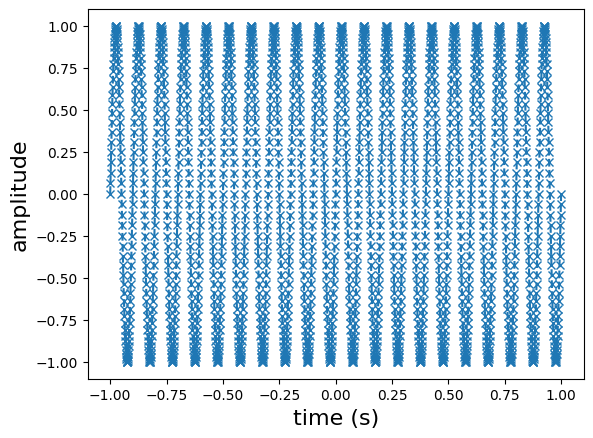

In [ ]:
###############################
## Student activity solution #1
###############################

frequency  = 10
sample_rate = 1000
time = np.arange(-1,1+1/sample_rate,1/sample_rate)

fig,ax = plt.subplots()
x_sa1 = np.sin(2*np.pi*frequency*time)

ax.plot(time,x_sa1,'x--')
ax.set_xlabel('time (s)',fontsize=16)
ax.set_ylabel('amplitude',fontsize=16)

### **Live coding:** Manipulating signal representations
Slicing is how you get a part of an array or matrix in Python (read up the Python docs or a [tutorial](https://www.oreilly.com/learning/how-do-i-use-the-slice-notation-in-python) if you need reminding about Python slicing).
1. Slice `x` from 0 to 1 seconds.
2. Plot the sliced wave.

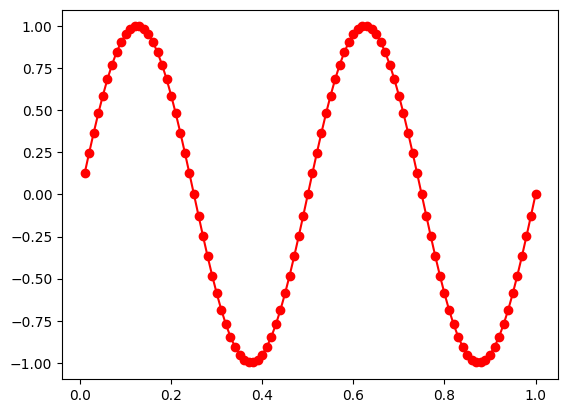

<Figure size 640x480 with 0 Axes>

In [ ]:
f  = 2.0
fs = 100
t = np.arange(-1,1+1/fs,1/fs)
x = np.sin(2*np.pi*f*t)

xslice=x[x.size//2+1::]
plt.plot(t[x.size//2+1::],xslice,'o-r')

plt.show()
plt.savefig('lab1fig5-1.pdf')

### **Live coding:** Reading and playing sounds (IPython widgets)
Playing a sound from a wav file using `IPython` widgets in a Jupyter notebook.
1. Import the libraries for audio retrival and playback.
2. Download the wav file from the cloud.
3. Instantiate a playback widget for playing the audio file.

In [ ]:
import IPython.display as ipd
import IPython
import ipywidgets as widgets
from IPython.display import clear_output

f_apples='./PL1_files/196959__margo-heston__i-see-nine-apples-m.wav'

ipd.Audio(filename=f_apples) # load a local WAV file

### **Live coding:** Reading and ploting wav signals (low level method)
There are lots of ways of doing things in Python. We can do things at a low level, for example, reading a sound file and plotting the digital signal using the `wave` [library](https://docs.python.org/3.7/library/wave.html#module-wave)
1. Import libraries
2. Open file and read frames
3. Plot sound file

44100


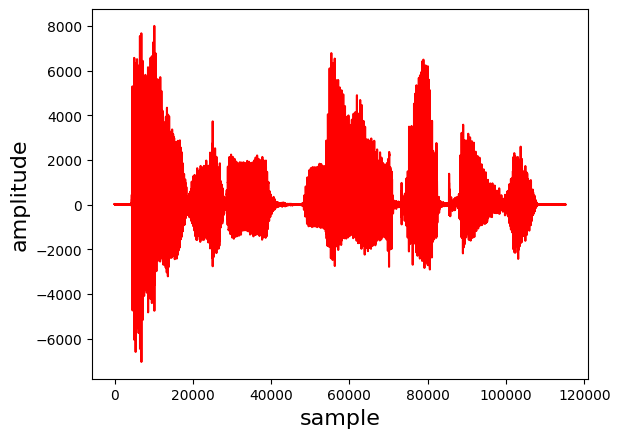

In [ ]:
from wave import open as open_wave

fp = open_wave(f_apples, 'r')

strframes = fp.readframes(fp.getnframes())
fp.close()
ys = np.frombuffer(strframes, dtype=np.int16)

fig,ax = plt.subplots()
ax.plot(ys,'-r')
ax.set_xlabel('sample',fontsize=16)
ax.set_ylabel('amplitude',fontsize=16)

print(fp.getframerate())

But if we want to have time on the x-axis rather than samples, we need to compute the time that corresponds to each sample.
4. Compute time (`ts`) using sampling rate.
5. Replot signal with the corresponding time.

Text(0, 0.5, 'amplitude')

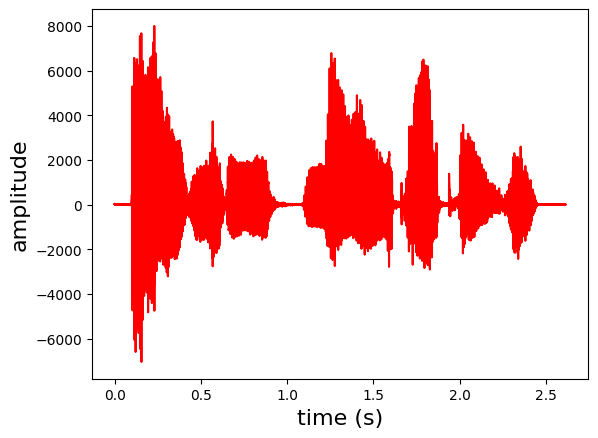

In [ ]:
ts = np.arange(len(ys)) / fp.getframerate()
fig,ax = plt.subplots()
ax.plot(ts,ys,'-r')
ax.set_xlabel('time (s)',fontsize=16)
ax.set_ylabel('amplitude',fontsize=16)

### **Live coding:** Reading and ploting wav signals (using librosa)
Reading and plotting wav files can also be done using `librosa`.
1. Load wav file (`librosa.load`).
2. Plot sound representation (`librosa.display.wavshow`).

Text(0.5, 1.0, 'apples plotted by librosa')

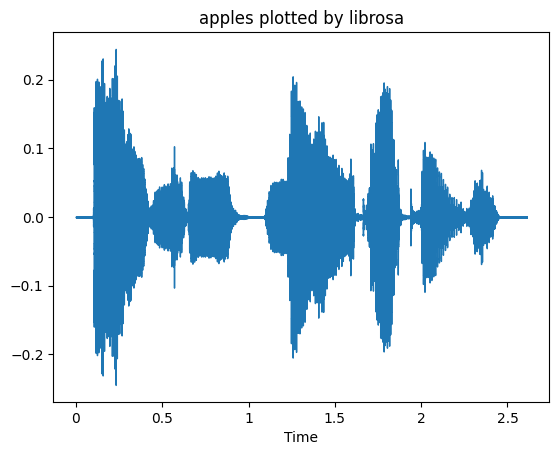

In [ ]:
f_apples='./PL1_files/196959__margo-heston__i-see-nine-apples-m.wav' # From freesound.org: http://freesound.org/people/margo_heston/sounds/196959/

#Open the wav file. It is a single channel (mono) 16 bit integer PCM encoded WAV file
snd, sr = librosa.load(f_apples)

librosa.display.waveshow(snd, sr=sr)
plt.title('apples plotted by librosa')



### **Live coding:** Ploting waveforms and spectrograms
Plot a monophonic waveform and a spectrogram time frequency representation for the human and synthetic welcome messages.
1. Load the natural and synthetic wav files (using `librosa`).
2. Plot waveform signals.
3. Compute the audio signal representation in the frequency domain.
  - Compute the Short-Time Fourier Transform (`librosa.stft`)
  - Obtain the magnitude (amplitude) information (`np.abs`)
  - Convert the amplitudes to a logarithmic scale (`librosa.amplitude_to_db`)
4. Plot spectrogram representation (`librosa.display.specshow`).
5. Instantiate playback widgets for playing the audio files.

Text(0.5, 1.0, 'Log-frequency power spectrogram: Hawking')

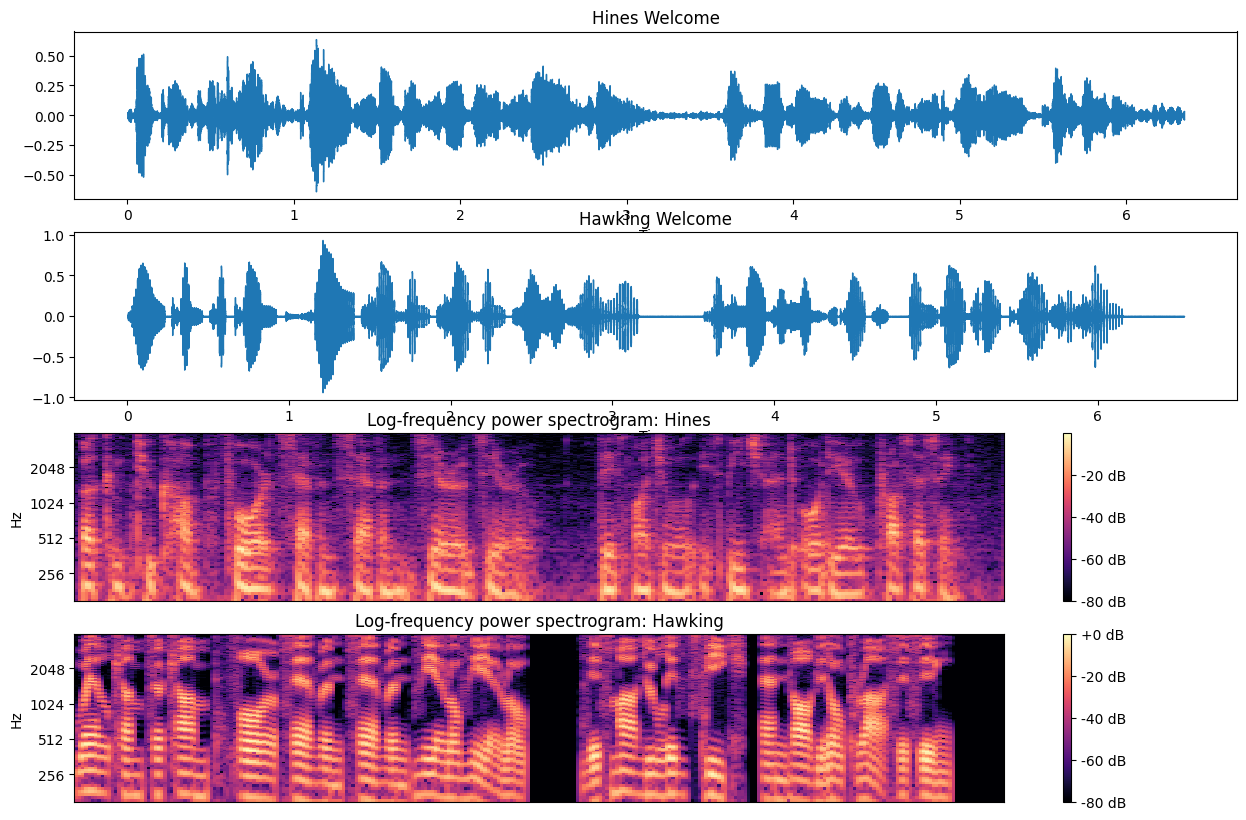

In [ ]:
f_natural = './PL1_files/hinesCOMP47700.wav'
f_synth = './PL1_files/hawkingCOMP47700.wav'

y_hines, sr1 = librosa.load(f_natural)
y_hawking, sr1 = librosa.load(f_synth)

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
librosa.display.waveshow(y_hines, sr=sr)
plt.title('Hines Welcome')

plt.subplot(4, 1, 2)
librosa.display.waveshow(y_hawking, sr=sr)
plt.title('Hawking Welcome')

plt.subplot(4, 1, 3)
D1 = librosa.amplitude_to_db(np.abs(librosa.stft(y_hines,n_fft=2048)),  ref=np.max)
librosa.display.specshow(D1, y_axis='log')
plt.ylim((150,4000))
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram: Hines')

plt.subplot(4, 1, 4)
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(y_hawking,n_fft=2048)),  ref=np.max)
librosa.display.specshow(D2, y_axis='log')
plt.ylim((150,4000))
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram: Hawking')


In [ ]:
ipd.Audio(filename=f_natural)

In [ ]:
ipd.Audio(filename = f_synth)

### **Live coding:** Normalising audio signals
Normalizing the amplitude of a signal is to change the amplitude to meet a particular criterion. To do so, we use the the `librosa.util.normalize` function from `librosa`.
1. Load wav files.
2. Normalise the signal using `librosa.util.normalize`.
3. Plot original and normalised wavforms versions of the wav file.
4. Plot an attenuated version of the waveform with +/-0.3 headroom.

<ipython-input-20-ce0c6259e046>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


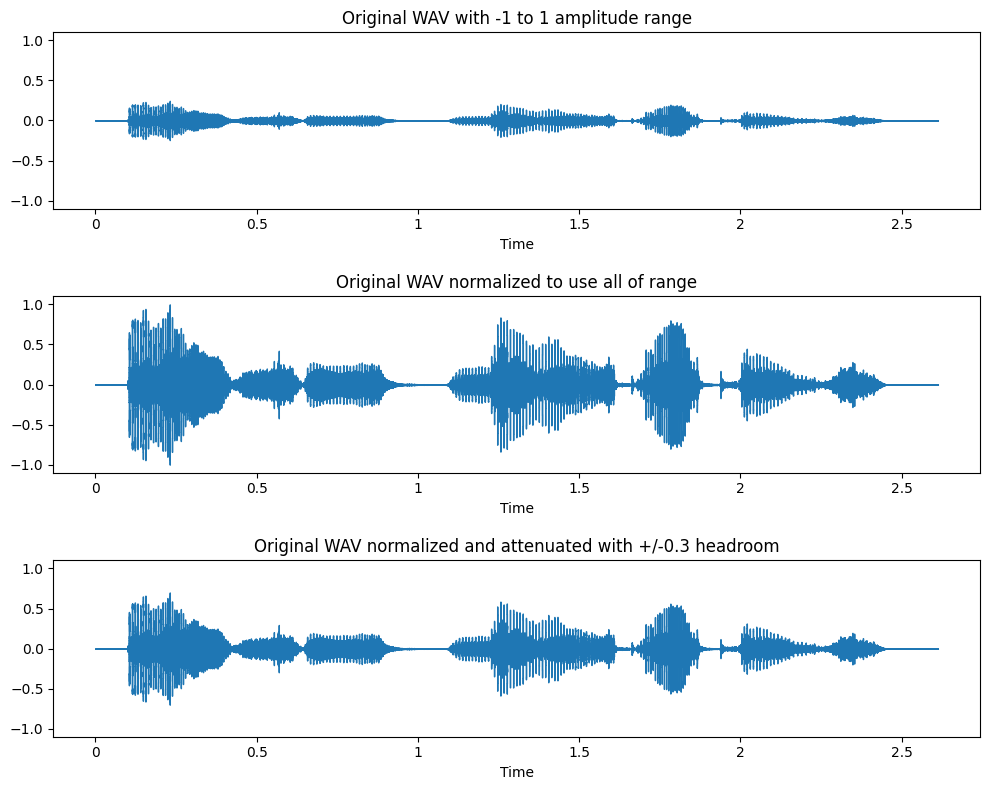

In [ ]:
f_apples='./PL1_files/196959__margo-heston__i-see-nine-apples-m.wav' # From freesound.org: http://freesound.org/people/margo_heston/sounds/196959/

#Open the wav file. It is a single channel (mono) 16 bit integer PCM encoded WAV file
snd,sr = librosa.load(f_apples)

snd_norm = librosa.util.normalize(snd)

fig, ax1 = plt.subplots(figsize=(10, 8))

plt.subplot(3,1,1)
librosa.display.waveshow(snd, sr=sr)
plt.ylim([-1.1,1.1])
plt.title('Original WAV with -1 to 1 amplitude range')

plt.subplot(3,1,2)
librosa.display.waveshow(snd_norm, sr=sr)
plt.ylim([-1.1,1.1])
plt.title('Original WAV normalized to use all of range')

plt.subplot(3,1,3)
librosa.display.waveshow(snd_norm*.7, sr=sr)
plt.ylim([-1.1,1.1])
plt.title('Original WAV normalized and attenuated with +/-0.3 headroom')

plt.tight_layout(h_pad=1.6)

plt.draw()


Listen to the normalised original and the amplified clipped - can you hear the difference?

In [ ]:
ipd.Audio(snd, rate=sr, normalize=False)

In [ ]:
ipd.Audio(snd_norm, rate=sr)

In [ ]:
ipd.Audio(snd_norm*.7, rate=sr, normalize=False)

### **Student activity #2:** Signal normalisation
* Generate an amplified version (amplified by 3) of the original signal (`snd`).
* Limit the amplified version to a range of -1 to +1.
* Plot the amplified version of the signal.
* Instantiate a playback widget to play the amplified audio file.

<ipython-input-24-d3e7eb07dda1>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


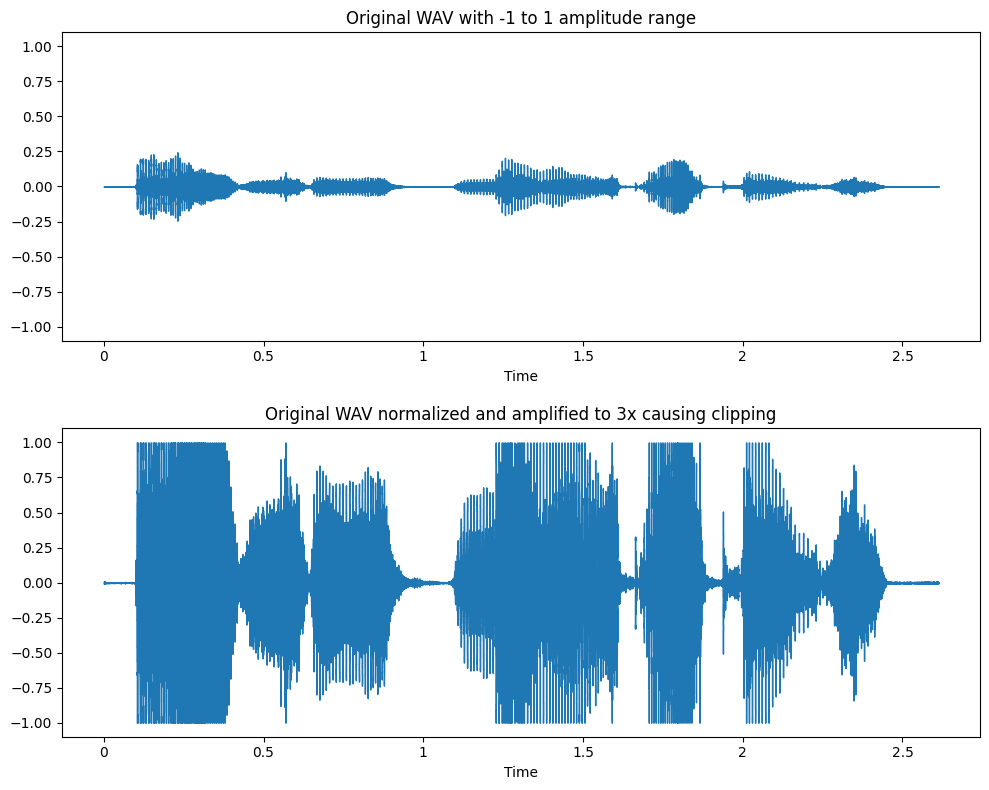

In [ ]:
###############################
## Student activity solution #2
###############################

f_apples='./PL1_files/196959__margo-heston__i-see-nine-apples-m.wav' # From freesound.org: http://freesound.org/people/margo_heston/sounds/196959/

#Open the wav file. It is a single channel (mono) 16 bit integer PCM encoded WAV file
snd,sr = librosa.load(f_apples)
snd_norm = librosa.util.normalize(snd)

fig, ax1 = plt.subplots(figsize=(10, 8))

plt.subplot(2,1,1)
librosa.display.waveshow(snd, sr=sr)
plt.ylim([-1.1,1.1])
plt.title('Original WAV with -1 to 1 amplitude range')

amplified=snd_norm*3
amplified[amplified>1]=1 #Limit the amplified version to a range of -1 to +1
amplified[amplified<-1]=-1

plt.subplot(2,1,2)
librosa.display.waveshow(amplified, sr=sr)
plt.ylim([-1.1,1.1])
plt.title('Original WAV normalized and amplified to 3x causing clipping')
plt.tight_layout(h_pad=1.6)

plt.draw()

In [ ]:
ipd.Audio(snd, rate=sr, normalize=False)

In [ ]:
ipd.Audio(amplified, rate=sr, normalize=False)

### **Live coding:** Quantization in Python
An analogue sound is a continuous, infinitely divisable signal, represented as $s(t)$. A discrete time signal, has continuous amplitude resolution but it sampled at discrete times, represented as $s[t]$. Conversely a quantized analogue signal $x_Q(t)$ has discrete amplitute. A digital signal, is both time and amplitude discrete and is denoted with square brackets, $s_D[t]$.  A digitial signal has a sampling rate and a bit depth.
1. Generate an analogue (discrete) signal representation (`x`).
2. Generate the quantized signal representation for the analogue signal (`xQ`).
3. Calculate the quantization error `e` (difference between discrete and quantized).
4. Plot the discrete, quantized, and error in the same figure.

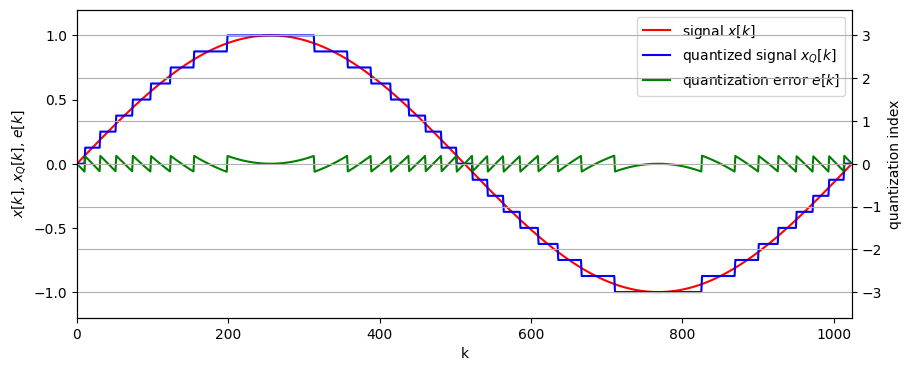

In [ ]:
N = 1024  # length of signal

# generate signal
x = np.sin(2*np.pi/N * np.arange(N))
# quantize signal
xi = np.round(8 * x)
xQ = 1/8 * xi
e = xQ - x

# plot (quantized) signals
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'signal $x[k]$')
ax1.plot(xQ, 'b', label=r'quantized signal $x_Q[k]$')
ax1.plot(e, 'g', label=r'quantization error $e[k]$')
ax1.set_xlabel('k')
ax1.set_ylabel(r'$x[k]$, $x_Q[k]$, $e[k]$')
ax1.axis([0, N, -1.2, 1.2])
ax1.legend()

ax2.set_ylim([-3.6, 3.6])
ax2.set_ylabel('quantization index')
ax2.grid()

### **Student activity #3:** Signal quantization
Use the provided signal (440 Hz, 8000 samples per second, 2 seconds duration) to:
* Plot the original (discrete) signal.
* Generate and plot the quantised version of that signal (quantization factor of 3).
* Instantiate playback widgets for playing the audio files.

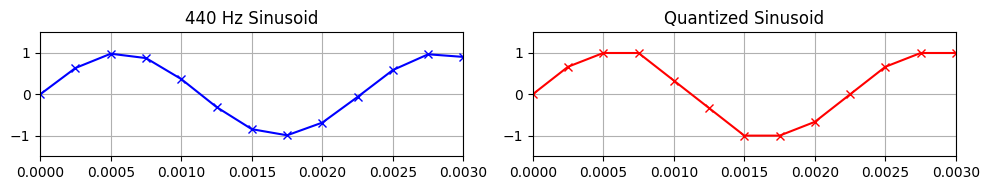

In [ ]:
###############################
## Student activity solution #3
###############################

# Create figure with 2 subplots. 2 rows and 1 coloumn
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10,2))

# Sample rate of the periodic signal we will generate
Fs = 8000

# Time duration of the signals
t = np.linspace(0, 2, Fs , False)  # 2s with 8000 samples/second=16k samples

# Generate signal with 440 Hz frequency and quantize it
sig1 = np.sin(2*np.pi*440*t)


xi = np.round(3 * sig1)
sig_quant = 1/3 * xi


# Plot the 440Hz signal in first subplot using default color line
ax1.plot(t, sig1, 'b-x')
ax1.set_title('440 Hz Sinusoid')
ax1.axis([0, 0.25, -1.5, 1.5])
ax1.grid(True)
# Plot the quantized signal in second subplot using red color line
ax2.plot(t, sig_quant, 'r-x')
ax2.set_title('Quantized Sinusoid')
ax2.axis([0, 0.003, -1.5, 1.5])
ax2.grid(True)

# draw an arrow and label to highlight the 4th sample where the quantization
# error can bee clearly seen as the sample point is at 1 rather than below it.
#plt.arrow(t[3], -0.2, 0, 0.75, width = t[1]/20, head_width = t[1]*.5, head_length = .25 , facecolor='black', edgecolor='none')
#plt.text(x = t[3],y = -.5,s = 'q error')
plt.tight_layout()

plt.show()

In [ ]:
# The sound above is the original 440 Hz tone
ipd.Audio(sig1, rate=8000, normalize=False)

In [ ]:
# The sound below is the quantized version
ipd.Audio(sig_quant, rate=8000, normalize=False)

### **Live coding:** Quantization in audio files
1. Try the quantization effect over speech signals (`snd_norm`).
2. Vary the quantization factors (16, 8, 3).
3. Instantiate playback widgets for playing the audio files.

In [ ]:
#Listen to what happens to speech, quantized at different factors
#try 16, 8, 3
quant_factor = 3
qvoice =  np.round(quant_factor * snd_norm)
qvoice = 1/quant_factor * qvoice
ipd.Audio(qvoice, rate = sr )

---
# Assignment Questions PL1

Upload files from local system provided for this assignment (`PL1_files_assignment.zip`)

In [ ]:
from google.colab import files
zipname = 'PL1_files_assignment.zip'
uploaded = files.upload()

Saving PL1_files_assignment.zip to PL1_files_assignment.zip


In [ ]:
import zipfile
# Extract the zip file
with zipfile.ZipFile(zipname, 'r') as zip_ref:
  zip_ref.extractall()  # Extract all files to the current directory

## Assignment question 1
**Discrete digital time series signal maninpuation.** Generate a periodic cosine/sine signal at 440 Hz with a dynamic range of `[-0.5 +0.5]` amplitute and 1 second duration. Fix the amplitude to zero for 200 samples (250ms @ sampling rate of 8000). This will give us a notch that we can hear in the pure tone. Plot the signal with labelled axes and title. Instantiate playback widgets for playing the audio. Use `numpy`, `matplotlib`, and `IPython.display` for this question. (5pts)

In [ ]:
##################################
## Assignment question solution #1
##################################


## Assignment question 2
**File handling, signal manipluation, domain transform and visualisations.**
Read the given wave file containing the utterance 'I see nine apples'. Segment it to create a signal containing the word `apples`. Compute the STFT of the signal. Plot the time domain signal and spectrogram for the word `apples` with labelled axes for the subplots. (5pts)

In [ ]:
# Wav file for this question
############################

f_apples='./PL1_files_assignment/196959__margo-heston__i-see-nine-apples-m.wav'

In [ ]:
##################################
## Assignment question solution #2
##################################


## Assignment question 3
Read the wav file provided in this exercise. Slice the file to 0 to 2 s, name this signal `slice_signal`.  Amplify the `slice_signal` by 4 and name this signal `amplified_signal`. Take this resulting signal and normalise it to limit the amplitude range to -1 to +1, name this resulting signal `norm_signal`. Take `norm_signal` and apply a quantisation factor of 8, name this signal `q_signal`.

Instantiate playback widgets for playing the audio for `slice_signal`, `amplified_signal`, and `q_signal`.

In a single figure, plot the waveforms for `slice_signal`, `amplified_signal` and `q_signal`. Add a legend with labels for each waveform. (5pts)

In [ ]:
# Wav file for this question
############################

h_comp='./PL1_files_assignment/hinesCOMP47700.wav'